In [2]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
df = pd.read_csv(r"C:\Users\adabh\OneDrive\Desktop\python\covid-sql-data-analysis\movies.csv")

In [6]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [17]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [18]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [27]:
df[df.duplicated()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [28]:
nan_cols_count = df.isna().sum()
nan_cols_count

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [29]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=cac2a0911f25f8b32383ec4e8ced1265b980526522a073a921d7898d9a463644
  Stored in directory: c:\users\adabh\appdata\local\pip\cache\wheels\63\e8\ec\75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


In [30]:
from pandasql import sqldf

In [34]:
query = '''
    select company, sum(budget)
    from df
    where company like 'columbia%'
    group by company
'''
result = sqldf(query)
print(result)

                                  company   sum(budget)
0                          Columbia Films           NaN
1                       Columbia Pictures  1.551211e+10
2  Columbia Pictures Film Production Asia  2.000000e+07
3            Columbia Pictures Industries  4.200000e+07


In [35]:
nan_cols_count = df.isna().sum()
nan_cols_count

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [36]:
df = df.dropna()

In [37]:
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [42]:
df['company'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7648     True
7649     True
7650     True
7651    False
7652    False
Name: company, Length: 5421, dtype: bool

In [44]:
df['writer'].duplicated().sum()

2216

<h1> Finding Out the Most Successful company <h1>

In [6]:
df['profit'] = df['gross'] - df['budget']

In [21]:
profit_by_company = df.groupby('company')['profit'].sum()

In [49]:
print(profit_by_company)

company
"DIA" Productions GmbH & Co. KG          8350926.0
"Weathering With You" Film Partners    182357467.0
.406 Production                          -239420.0
1492 Pictures                           57256250.0
1818 Productions                         7232628.0
                                          ...     
erbp                                      537174.0
i am OTHER                              10986781.0
i5 Films                                 7031529.0
micro_scope                               299598.0
thefyzz                                 56898461.0
Name: profit, Length: 1475, dtype: float64


In [22]:
top_10_companies = profit_by_company.nlargest(10)

In [57]:
print(top_10_companies)

company
Universal Pictures       3.525138e+10
Warner Bros.             3.510766e+10
Twentieth Century Fox    2.806797e+10
Columbia Pictures        2.684432e+10
Paramount Pictures       2.629825e+10
Walt Disney Pictures     2.542895e+10
New Line Cinema          1.396765e+10
Marvel Studios           1.240159e+10
DreamWorks Animation     8.529613e+09
Dreamworks Pictures      7.632108e+09
Name: profit, dtype: float64


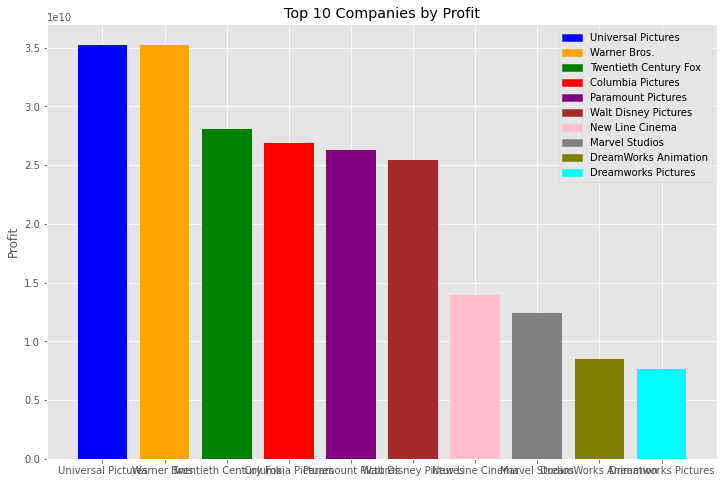

In [28]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# create a bar chart of the top 10 companies by profit
plt.bar(top_10_companies.index, top_10_companies.values, color=colors)

# set the chart title and axis labels
plt.title('Top 10 Companies by Profit')

plt.ylabel('Profit')

# create a legend for the companies
legend_handles = []
for i, company in enumerate(top_10_companies.index):
    legend_handles.append(plt.Rectangle((0,0), 1, 1, color=colors[i]))
plt.legend(legend_handles, top_10_companies.index)

# display the chart
plt.show()

<h1>Least successful companies</h1>

In [64]:
bottom_10_companies = profit_by_company.nsmallest(10)

In [65]:
bottom_10_companies

company
Franchise Pictures                     -199465731.0
Tribeca Productions                    -168542618.0
Gaumont                                 -94635781.0
Appian Way                              -91659891.0
Beijing New Picture Film                -91144356.0
Beckner/Gorman Productions              -87982678.0
Recorded Picture Company (RPC)          -81383881.0
Boll Kino Beteiligungs GmbH & Co. KG    -81286888.0
Hammerhead Productions                  -75171919.0
Turner Pictures (I)                     -71378739.0
Name: profit, dtype: float64

<h1> Relation between movies score and profit</h1>

In [68]:
# selecting the columns we need
movies_subset = df[['name', 'score', 'profit']]

In [69]:
movies_subset

,name,score,profit
0,The Shining,8.4,27998772.0
1,The Blue Lagoon,5.8,54353106.0
2,Star Wars: Episode V - The Empire Strikes Back,8.7,520375067.0
3,Airplane!,7.7,79953539.0
4,Caddyshack,7.3,33846344.0
...,...,...,...
7648,Bad Boys for Life,6.6,336505244.0
7649,Sonic the Hedgehog,6.5,234715683.0
7650,Dolittle,5.6,70487753.0
7651,The Call of the Wild,6.8,-23894503.0


In [71]:
# calculate the correlation between score and profit
correlation = movies_subset['score'].corr(movies_subset['profit'])
print('Correlation between score and profit:', correlation)

Correlation between score and profit: 0.24334004359346878


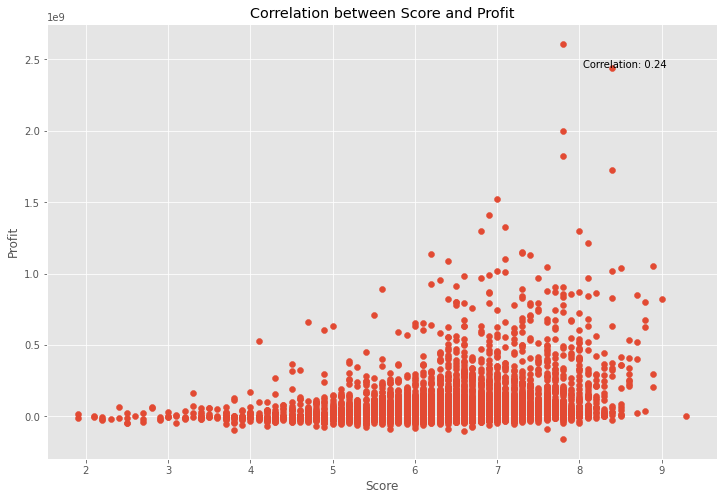

In [72]:
plt.scatter(movies_subset['score'], movies_subset['profit'])

# set the chart title and axis labels
plt.title('Correlation between Score and Profit')
plt.xlabel('Score')
plt.ylabel('Profit')

# add a text box with the correlation coefficient
plt.text(0.8, 0.9, 'Correlation: {:.2f}'.format(correlation), transform=plt.gca().transAxes)

# display the chart
plt.show()

In [73]:
import seaborn as sns

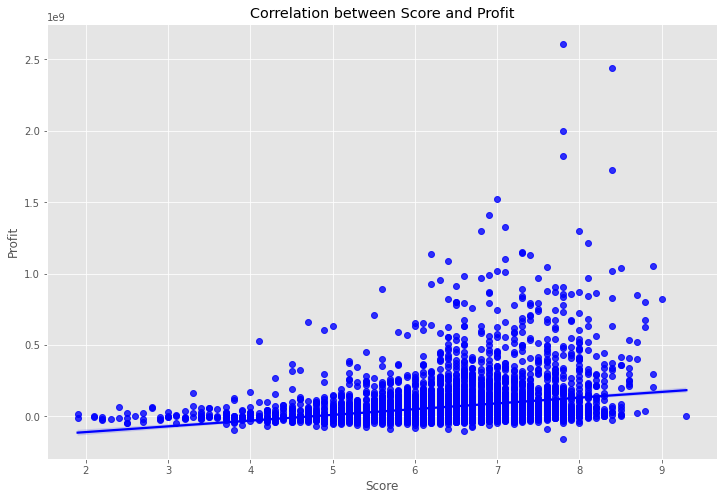

In [75]:
# create a regression plot
sns.regplot(x=movies_subset['score'], y=movies_subset['profit'], color='blue')

# set the chart title and axis labels
plt.title('Correlation between Score and Profit')
plt.xlabel('Score')
plt.ylabel('Profit')

# display the chart
plt.show()

<h1>Relation between budget and Profit</h1>

In [79]:
movies_subset1 = df[['name', 'budget', 'profit']]

# calculate the correlation between budget and profit
correlation = movies_subset1['budget'].corr(movies_subset['profit'])
print('Correlation between budget and profit:', correlation)

Correlation between budget and profit: 0.6105298149985218


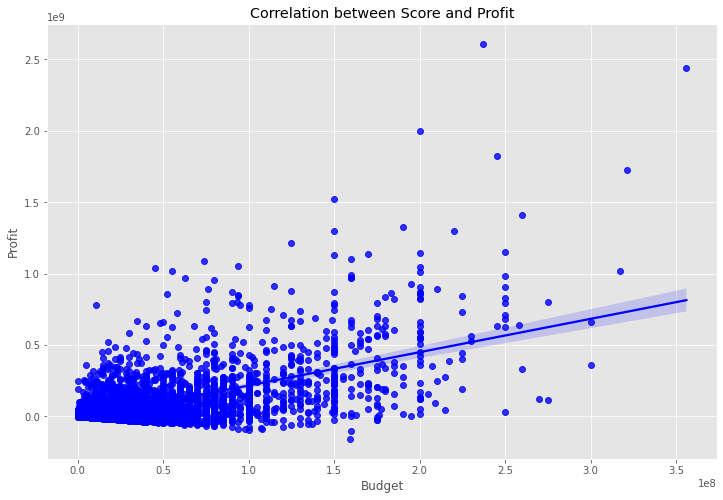

In [78]:
# create a regression plot
sns.regplot(x=movies_subset1['budget'], y=movies_subset['profit'], color='blue')

# set the chart title and axis labels
plt.title('Correlation between Score and Profit')
plt.xlabel('Budget')
plt.ylabel('Profit')

# display the chart
plt.show()

<h1>Which country has the higest gross collection in total<h1>

In [20]:
movies_subset2 = df[['name','country','company','gross']]

In [22]:
gross_by_country = df.groupby('country')['gross'].sum()
top_ten_countries = gross_by_country.nlargest(10)

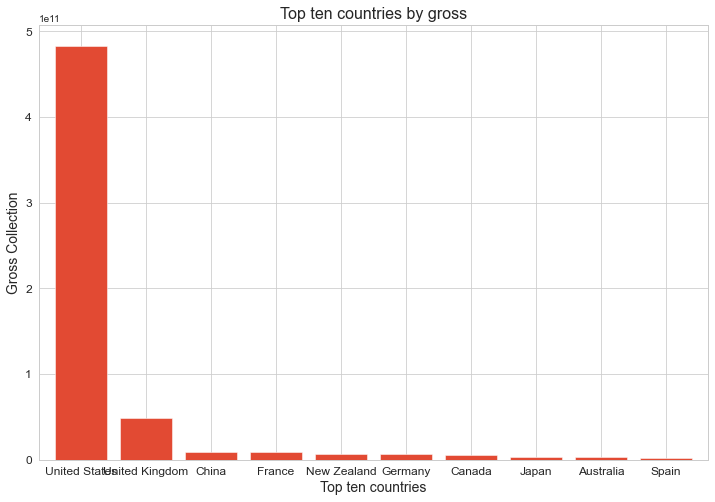

In [25]:
# Create the bar chart
top_ten_countries.plot.bar(width=0.8)
plt.title('Top ten countries by gross', fontsize=16)
plt.xlabel('Top ten countries', fontsize=14)
plt.ylabel('Gross Collection', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<h1>correlation among various factors </h1>

In [11]:
correlation_matrix = df.corr()
correlation_matrix

,year,score,votes,budget,gross,runtime,profit
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811,0.237364
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451,0.242928
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212,0.609313
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447,0.610661
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216,0.984418
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000,0.241337
profit,0.237364,0.242928,0.609313,0.610661,0.984418,0.241337,1.000000


<h3>Visualizing in heatmap </h3>

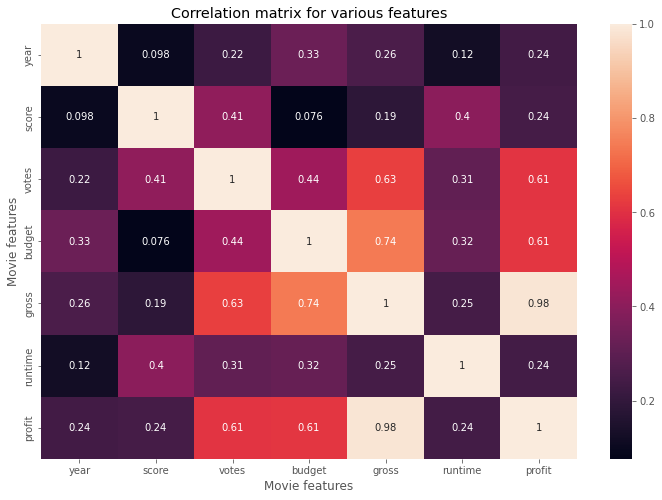

In [19]:
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix for various features")
plt.xlabel('Movie features')
plt.ylabel("Movie features")
plt.show()